In [1]:
import cv2
import matplotlib.pyplot as plt
# import pandas as pd
import tensorflow as tf
import keras
import os
import numpy as np
import pandas as pd
# from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
import shutil
PATH = "/mnt/d/Datasets/"
full_img_path = '/mnt/c/Users/user/Desktop/CBIS-DDSM/full/'
save = '/mnt/d/Datasets/CBIS-DDSM/full_mammogram_image/augmented/'
image_size = 300
batch_size = 16
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
os.environ['TF_ENABLE_GPU_GARBAGE_COLLECTION'] = 'false'
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2023-02-21 23:29:04.788844: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-21 23:29:05.963866: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jj/miniconda3/envs/tf/lib/python3.9/site-packages/cv2/../../lib64:/usr/local/cuda/include:/usr/local/cuda/lib64:/usr/local/cuda-11.2/lib64::/usr/local/cuda/extras/CUPTI/lib64:/home/jj/miniconda3/envs/tf/lib/
2023-02-21 23:29:05.964004: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugi

Num GPUs Available:  1


2023-02-21 23:29:07.246326: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-21 23:29:07.275214: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-21 23:29:07.275261: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [13]:
list_test_benign = tf.data.Dataset.list_files(str(full_img_path+'test/benign/*.png'), shuffle=True)
list_test_malignant = tf.data.Dataset.list_files(str(full_img_path+'test/malignant/*.png'), shuffle=True)
list_train_benign = tf.data.Dataset.list_files(str(full_img_path+'train/benign/*.png'), shuffle=True)
list_train_malignant = tf.data.Dataset.list_files(str(full_img_path+'train/malignant/*.png'), shuffle=True)

In [14]:
list_train_benign = list_train_benign.take(len(list_train_malignant))
list_test_benign = list_test_benign.take(len(list_test_malignant))
val_size = int(len(list_train_benign)*0.2)
list_val_benign = list_train_benign.take(val_size)
list_train_benign = list_train_benign.skip(val_size)
list_val_malignant = list_train_malignant.take(val_size)
list_train_malignant = list_train_malignant.skip(val_size)

In [15]:
list_test = list_test_benign.concatenate(list_test_malignant)
list_train = list_train_benign.concatenate(list_train_malignant)
list_val = list_val_benign.concatenate(list_val_malignant)
len(list_train)

1768

In [16]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal_and_vertical'),
  tf.keras.layers.RandomRotation((0,0.5),fill_mode='constant'),
  tf.keras.layers.RandomZoom(height_factor=(-0.2,0.2),width_factor=(-0.2,0.2),fill_mode='constant'),
  tf.keras.layers.RandomTranslation(height_factor=(-0.1,0.1),width_factor=(-0.1,0.1),fill_mode='constant')
  ])

In [17]:
img_height = 600
img_width = 300

In [18]:
# for i in list_test.take(1):
    # save = i.numpy()
    # print(save)
    # print(tf.strings.join(,separator='/').numpy())

In [19]:
# def load_image(image):
    # img = tf.io.read_file(image)
    # img = tf.io.decode_png(img,channels=3)
    # return tf.image.resize_with_pad(img,img_height,img_width)
# @tf.function
# 
# def write_image(image,file_path):
    # img = tf.io.encode_png(img)
    # save = tf.strings.split(file_path, os.path.sep)
    # save = tf.strings.join([save])
    # tf.io.write_file()
# 
# def process_data(file_path):
    # label = get_label(file_path)
    # image = load_image(file_path)
    # image1 = image
    # image2 = data_augmentation(image)
    # tf.io.encode_
    
def preprocess(file_path):
    data = cv2.imread(file_path,cv2.IMREAD_GRAYSCALE)
    # data_blur = cv2.GaussianBlur(data, (5, 5), 5)
    # _, thresh = cv2.threshold(data_blur, 250, 255, cv2.THRESH_BINARY_INV)
    # contours, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    # largest_contours = max(contours, key=cv2.contourArea)
    # img_contour = np.zeros(data.shape,np.uint8)
    # cv2.drawContours(img_contour, [largest_contours], -1, 255, -1)
    # img_no_bg = cv2.bitwise_and(data_blur,data_blur,mask=img_contour)
    # _, thresh = cv2.threshold(img_no_bg, 10, 255, cv2.THRESH_BINARY)
    # contours, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    # largest_contours = max(contours, key=cv2.contourArea)
    # img_contour = np.zeros(data.shape,np.uint8)
    # cv2.drawContours(img_contour, [largest_contours], -1, 255, -1)
    # img_no_label = cv2.bitwise_and(img_no_bg,img_no_bg,mask=img_contour)      
    img_no_label=cv2.resize(data,(img_width,img_height))
    return img_no_label

def process_image(file_path,data_set,augment=False):
    image_dir = tf.compat.as_str(file_path.numpy())
    image = preprocess(image_dir)
    image_name = image_dir.split('/')[-1].split('.')[0]
    save_path = str(save) + str(data_set) +'/'+str(image_dir.split('/')[-2])+'/'+str(image_name)
    print(save_path) 
    cv2.imwrite(save_path+'.png',image)
    img2 = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
    if augment:
        img2 = data_augmentation(img2)    
        cv2.imwrite(save_path+'_1.png',img2.numpy())

In [20]:
for x in list_val:
    process_image(x,'val')

/mnt/d/Datasets/CBIS-DDSM/full_mammogram_image/augmented/val/benign/Mass-Training_P_01153_RIGHT_CC
/mnt/d/Datasets/CBIS-DDSM/full_mammogram_image/augmented/val/benign/Calc-Training_P_00538_RIGHT_CC
/mnt/d/Datasets/CBIS-DDSM/full_mammogram_image/augmented/val/benign/Calc-Training_P_00955_RIGHT_MLO
/mnt/d/Datasets/CBIS-DDSM/full_mammogram_image/augmented/val/benign/Calc-Training_P_01306_RIGHT_MLO
/mnt/d/Datasets/CBIS-DDSM/full_mammogram_image/augmented/val/benign/Mass-Training_P_01889_RIGHT_CC
/mnt/d/Datasets/CBIS-DDSM/full_mammogram_image/augmented/val/benign/Calc-Training_P_01759_RIGHT_CC
/mnt/d/Datasets/CBIS-DDSM/full_mammogram_image/augmented/val/benign/Mass-Training_P_01702_RIGHT_CC
/mnt/d/Datasets/CBIS-DDSM/full_mammogram_image/augmented/val/benign/Calc-Training_P_01579_RIGHT_CC
/mnt/d/Datasets/CBIS-DDSM/full_mammogram_image/augmented/val/benign/Calc-Training_P_01767_LEFT_CC
/mnt/d/Datasets/CBIS-DDSM/full_mammogram_image/augmented/val/benign/Calc-Training_P_01387_LEFT_CC
/mnt/d/Dat

In [21]:
for x in list_train:
    process_image(x,'train',augment=True)
# for x in list_test:
    # process_image(x)
# for x in list_val:
    # process_image(x)

/mnt/d/Datasets/CBIS-DDSM/full_mammogram_image/augmented/train/benign/Calc-Training_P_01563_LEFT_MLO
/mnt/d/Datasets/CBIS-DDSM/full_mammogram_image/augmented/train/benign/Calc-Training_P_01029_LEFT_MLO
/mnt/d/Datasets/CBIS-DDSM/full_mammogram_image/augmented/train/benign/Calc-Training_P_01660_RIGHT_CC
/mnt/d/Datasets/CBIS-DDSM/full_mammogram_image/augmented/train/benign/Calc-Training_P_00704_LEFT_MLO
/mnt/d/Datasets/CBIS-DDSM/full_mammogram_image/augmented/train/benign/Calc-Training_P_01451_RIGHT_CC
/mnt/d/Datasets/CBIS-DDSM/full_mammogram_image/augmented/train/benign/Mass-Training_P_00592_LEFT_MLO
/mnt/d/Datasets/CBIS-DDSM/full_mammogram_image/augmented/train/benign/Calc-Training_P_00655_RIGHT_CC
/mnt/d/Datasets/CBIS-DDSM/full_mammogram_image/augmented/train/benign/Calc-Training_P_00833_LEFT_CC
/mnt/d/Datasets/CBIS-DDSM/full_mammogram_image/augmented/train/benign/Mass-Training_P_00517_LEFT_MLO
/mnt/d/Datasets/CBIS-DDSM/full_mammogram_image/augmented/train/benign/Calc-Training_P_00808_

In [46]:
print(image_dir.split('/')[-3]=='test')
print(str(save) + str(image_dir.split('/')[-3])+'/'+str(image_dir.split('/')[-2])+str(image_name))

True
b'/mnt/c/Users/user/Desktop/CBIS-DDSM/full/test/benign/Calc-Test_P_01460_LEFT_CC.png'test/benignMass-Test_P_00124_RIGHT_CC


In [27]:
def GCN(img):
    img_mean = np.mean(img)
    img_std = np.std(img)
    img = (img - img_mean) / img_std

    # Scale the image to the range [0, 255]
    img = ((img - np.min(img)) * 255 / (np.max(img) - np.min(img))).astype(np.uint8)
    return img

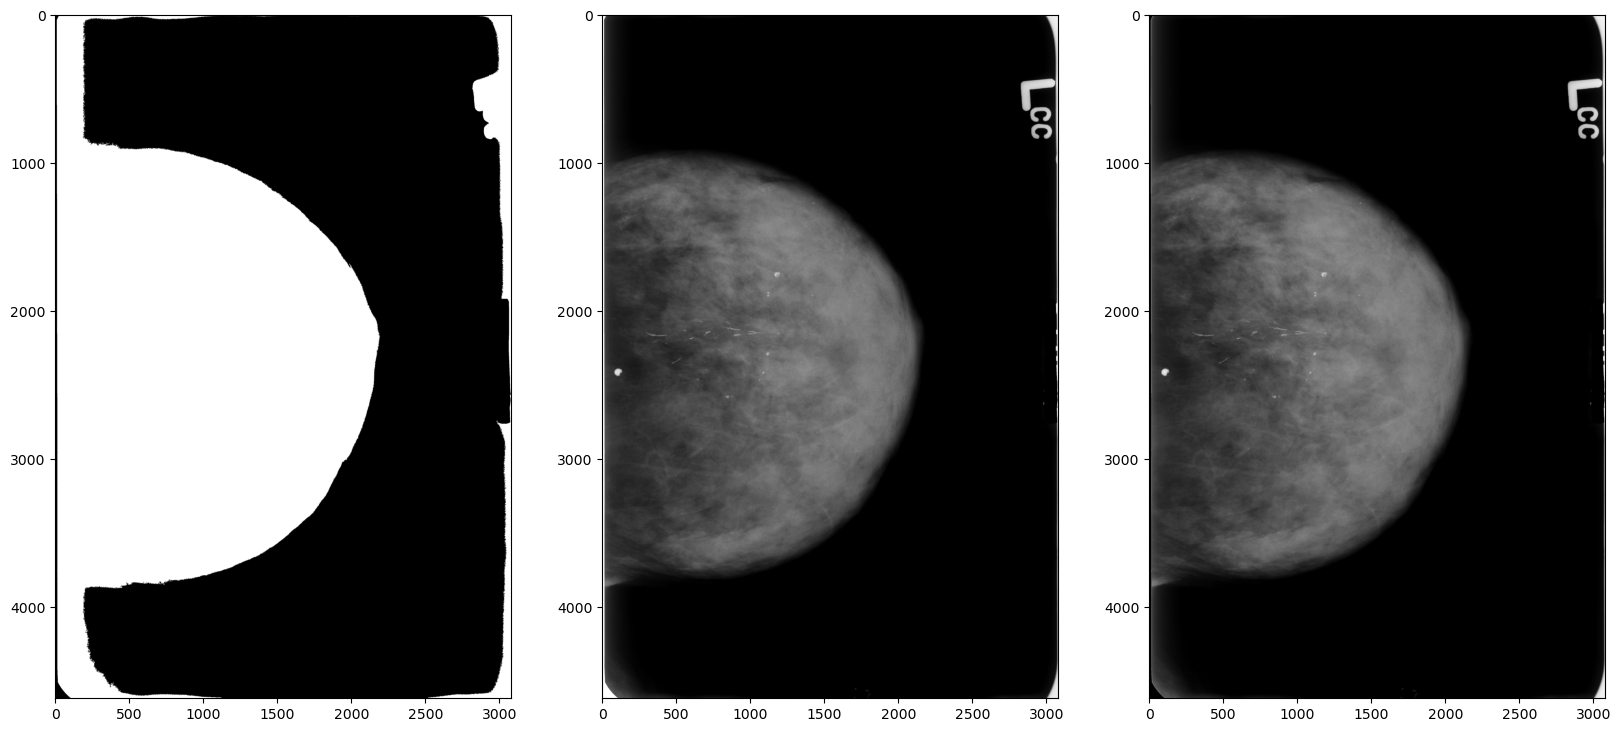

: 

In [39]:
# 
# for i in list_test.take(1):
    # image_dir = tf.compat.as_str(i.numpy())
data = cv2.imread('/mnt/c/Users/user/Desktop/CBIS-DDSM/full/train/benign/Calc-Training_P_00098_LEFT_CC.png',cv2.IMREAD_GRAYSCALE)
# data_2 =  cv2.normalize(data, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
data_2 = GCN(data)
# data = cv2.imread(image_dir,cv2.IMREAD_GRAYSCALE)
# data_blur = cv2.GaussianBlur(data, (5, 5), 5)
_, thresh = cv2.threshold(data, 127, 255, cv2.THRESH_TRIANGLE)
contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
largest_contours = max(contours, key=cv2.contourArea)
img_contour = np.zeros(data.shape,np.uint8)
img_contour = cv2.drawContours(img_contour, [largest_contours], -1, 255, -1)
img_no_bg = cv2.bitwise_and(data,img_contour)
_, thresh1 = cv2.threshold(img_no_bg, 250, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
# largest_contours = max(contours, key=cv2.contourArea)
img_contour = np.zeros(data.shape,np.uint8)

img_contour = cv2.drawContours(img_contour, contours, -1, 255, -1)
img_no_label = cv2.bitwise_and(img_no_bg,img_contour) 
# img_no_label =  cv2.normalize(img_no_label, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
img_no_label = GCN(img_no_label)
# img = cv2.cvtColor(img_no_label,cv2.COLOR_GRAY2RGB)  
# img = data_augmentation(img)     
# image_name = image_dir.split('/')[-1].split('.')[0]
# print(str(save) + str(image_dir.split('/')[-3])+'/'+str(image_dir.split('/')[-2])+image_name)
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.imshow(thresh,cmap='gray')
plt.subplot(132)
plt.imshow(data_2,cmap='gray')
plt.subplot(133)
plt.imshow(img_no_label,cmap='gray')

# cv2.imwrite('/mnt/c/Users/user/Desktop/CBIS-DDSM/test.png',img.numpy())   
